In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def readin_small_data():
    """Read small data set into a 2D numpy array
    return: numpy array contains the small data set, shape: (50,000, 230)
    """
    PATH = os.getcwd()
    DATA = os.path.join(PATH, 'orange_small_train','orange_small_train.data')
    with open(DATA) as f:
        header = f.readline().strip('\n').split('\t')
    
    data_type = {key:np.float64 for key in header[:190]}
    data_type.update({key:str for key in header[190:]})
    return pd.read_table(DATA, dtype=data_type)
    
def readin_label(target):
    """Read upselling, churn or appetency label into a 2D numpy array
    parameter target: choose which label to load
    return: numpy array contains the specified label of small data set, shape: (50,000, 1)
    """
    assert target in ['upselling', 'churn', 'appetency']
    PATH = os.getcwd()
    DATA = os.path.join(PATH, 'orange_small_train','orange_small_train_'+target+'.labels.txt')

    with open(DATA) as f:
        lines = f.readlines()
        data = list(map(lambda x: True if x.strip() == '1' else False, lines))

    return np.array(data)[:,np.newaxis]

data = readin_small_data()
print(data.shape)
upselling_label = readin_label('upselling')
print(upselling_label.shape)
#churn_label = readin_label('churn')
#print(churn_label.shape)
appetency_label = readin_label('appetency')
print(appetency_label.shape)
print(DATA[1])

(50000, 230)
(50000, 1)
(50000, 1)


NameError: name 'DATA' is not defined

In [ ]:
def readin_large_data():
    """Read small data set into a 2D numpy array
    return: numpy array contains the small data set, shape: (50,000, 230)
    """
    PATH = os.getcwd()
    data = []
    
    for i in range(1, 6):
        DATA = os.path.join(PATH, 'orange_large_train','orange_large_train.data.chunk' + str(i))
        with open(DATA) as f:
            line = f.readline()
            while line != '':
                data.append(line.strip('\n').split('\t'))
                line = f.readline()
    data = np.array(data)
    vect_None = np.vectorize(lambda x: x if x != '' else None)
    vect_int = np.vectorize(lambda x: float(x) if x != None else None)
    data = vect_None(data)
    data[:, :14740] = vect_int(data[:, :14740])
    return data
large_data = readin_large_data()
print(large_data.shape)

In [81]:
print('Percent of upselling: ', np.sum(upselling_label) / len(upselling_label))
print('Percent of churn: ', np.sum(churn_label) / len(churn_label))
print('Percent of appetency: ', np.sum(appetency_label) / len(appetency_label))

Percent of upselling:  0.07364
Percent of churn:  0.07344
Percent of appetency:  0.0178


In [135]:
print('Pecent of missing value: ', np.sum(data == None) / (data.shape[0] * data.shape[1]))

Pecent of missing value:  0.697752347826087


In [40]:
print('Pecent of missing value: ', data.isnull().sum().sum() / (data.shape[0] * data.shape[1]))

Pecent of missing value:  0.697752347826087


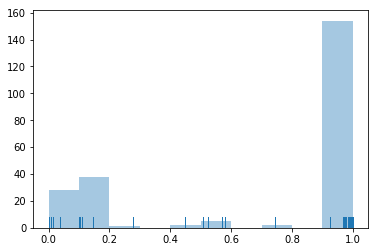

In [41]:
missing_rate = data.isnull().sum() / data.shape[0]
sns.distplot(missing_rate, kde=False, rug=True, bins=10)

In [48]:
np.sum((missing_rate < 0.5)[190:])

28

In [45]:
np.sum(missing_rate > 0.9)

154

(array([ 28.,  38.,   1.,   0.,   2.,   5.,   0.,   2.,   0., 154.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

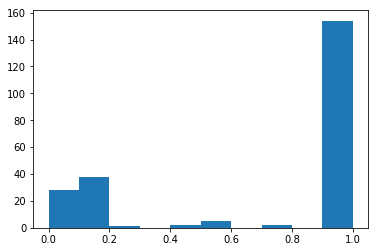

In [110]:
plt.hist(missing_rate)

/Users/weiichi/anaconda/envs/mlp/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


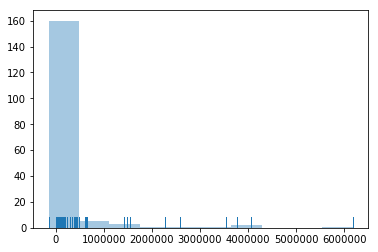

In [112]:
means = np.nanmean(numerical_data, axis=0)
sns.distplot(means[~np.isnan(means)], kde=False, rug=True, bins=10)

/Users/weiichi/anaconda/envs/mlp/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1434: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/weiichi/anaconda/envs/mlp/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


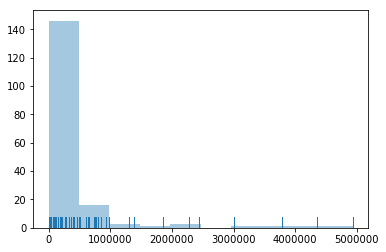

In [131]:
stds = np.nanstd(numerical_data, axis=0)
sns.distplot(stds[~np.isnan(stds) & (stds <10000000)], kde=False, rug=True, bins=10)

In [123]:
np.where(stds>10000000)

/Users/weiichi/anaconda/envs/mlp/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


(array([130]),)

In [126]:
numerical_data[500:1000,130]

array([         nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,       

In [129]:
PATH = os.getcwd()
DATA = os.path.join(PATH, 'orange_small_train','orange_small_train.data')

data1 = []
with open(DATA) as f:
    line = f.readline()
    line = f.readline()
    while line != '':
        data1.append(line.strip('\n').split('\t'))
        line = f.readline()
data1 = np.array(data1)
data1[500:1000,130]

array(['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '0', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '0', '', '', '', '', '', 

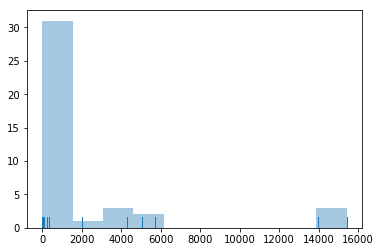

In [113]:
categories_count = np.apply_along_axis(lambda x: len(set(x)), 0, categorical_data)
sns.distplot(categories_count, kde=False, rug=True, bins=10)